### Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s - %(message)s') 


### Step 2:

**Data Uploaading Using Panadas Function**

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/mukeshmagar543/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
568,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,7,25.45
354,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,3,30.45
55,198.6,132.4,0.0,192.0,0.0,978.4,825.5,7,14.64
811,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28,27.92
...,...,...,...,...,...,...,...,...,...
583,210.7,316.1,0.0,185.7,0.0,977.0,689.3,28,37.81
563,210.7,316.1,0.0,185.7,0.0,977.0,689.3,7,21.82
379,500.0,0.0,0.0,140.0,4.0,966.0,853.0,28,67.57
847,280.0,129.0,100.0,172.0,9.0,825.0,805.0,28,52.82


### Step 3:

***Doing Exploratory Data Analysis [EDA] :---->***

1. Univariate Analysis

2. Bi Variate Analysis

In [3]:
from collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing': df[i].isnull().sum(),
        'Unique': df[i].nunique(),
        'Mode': df[i].mode().values[0],
        'Median': df[i].median(),
        'Mean': df[i].mean(),
        'Min' : df[i].min(),
        'Max' : df[i].max(),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQWR': df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing', 'Unique', 'Mode', 'Median', 'Mean', 'Min', 'Max', 'Standard Deviation', 'Variance', 'Skewness', 'Kurtosis', 'IQWR'], cmap='Reds')

,Feature,Type,Missing,Unique,Mode,Median,Mean,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,IQWR
0,cement,float64,0,278,362.600000,272.900000,281.167864,102.000000,540.000000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,22.000000,73.895825,0.000000,359.400000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,0.000000,54.188350,0.000000,200.100000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,float64,0,195,192.000000,185.000000,181.567282,121.800000,247.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.400000,6.204660,0.000000,32.200000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,968.000000,972.918932,801.000000,1145.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,779.500000,773.580485,594.000000,992.600000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,int64,0,14,28.000000,28.000000,45.662136,1.000000,365.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,34.445000,35.817961,2.330000,82.600000,16.705742,279.081814,0.416977,-0.313725,22.425000


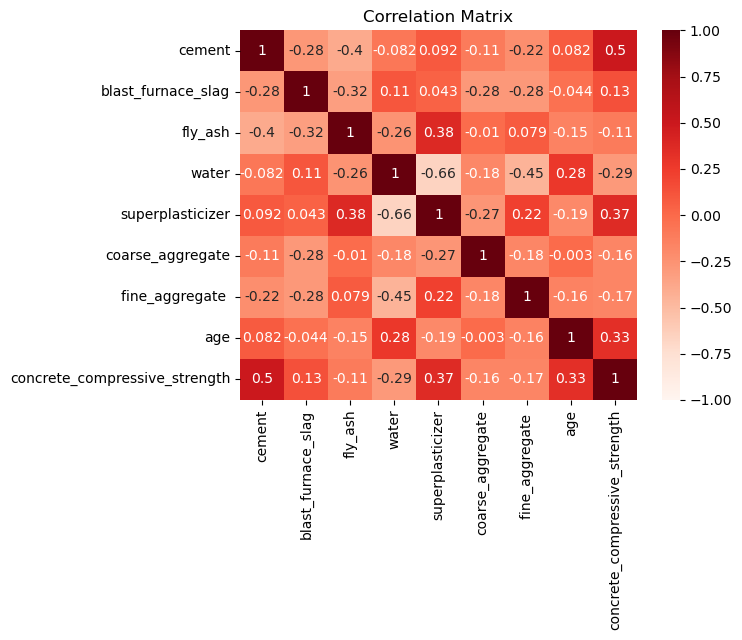

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ---> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Understanding Featuures and Create New Feature Based on Existing Features ---> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [8]:
df['Composite_Ratio'] = (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag']) / (df['water'])

In [9]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
Name: concrete_compressive_strength, dtype: float64

In [25]:
df['CRlk'] = (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag']) / (df['coarse_aggregate'] + df['water'])

In [30]:
df.drop('CRlk',axis=1, inplace=True)

In [13]:
df['Cement_water_ratio'] = df['cement'] / df['water']

In [31]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
Cement_water_ratio               0.559522
Name: concrete_compressive_strength, dtype: float64

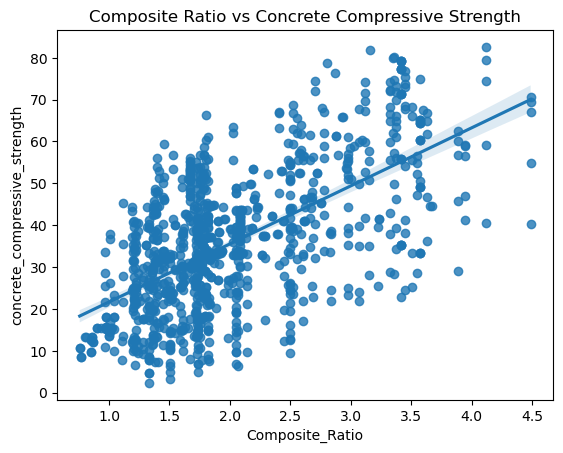

In [32]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

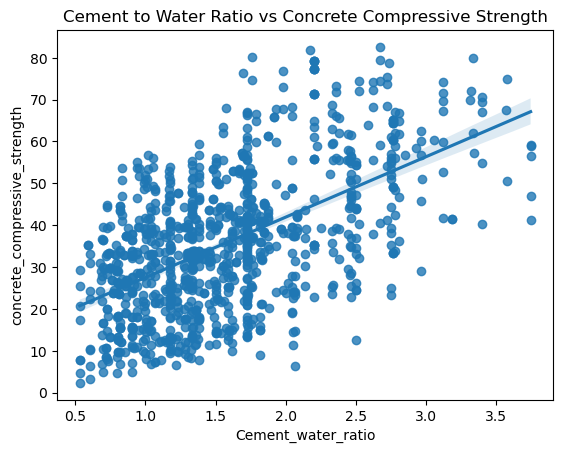

In [34]:
sns.regplot(x = df['Cement_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement to Water Ratio vs Concrete Compressive Strength')
plt.show()

### Step 5:

1. Split Data into Independent and Dependent Column i.e. X and y

2. Using Train and Test Split to Prevent Data Lekage.

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 'concrete_compressive_strength')
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Using Scaling Technique 

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)

X_test = scalar.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.5941935306287764